In [2]:
import gc
import hdf5plugin
import glob
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

from torch.utils.data import DataLoader
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

In [ ]:
def plot_gene_expression(ax, data, gene, title, model_name=None, img=None):
    sc.pl.spatial(data, color=gene, show=False, img_key=img, frameon=False,
                  title=title, legend_fontsize="x-large", ax=ax, colorbar_loc=None)
    if model_name is not None:
        ax.set_title(model_name, fontsize="x-large")

def refine_model_name(model_name):
    if model_name == "stimage":
        return "STimage"
    elif model_name == "stnet":
        return "STNet"
    elif model_name == "hist2st":
        return "Hist2ST"
    elif model_name == "histogene":
        return "HisToGene"
    elif model_name == "deepspace":
        return "DeepSpaCE"
    elif model_name == "deeppt":
        return "DeepPT"
    elif model_name == "bleep":
        return "BLEEP"
    else:
        return model_name

def splot_exp(dataset_name, slide, target_gene, gt_path):
    fig, axs = plt.subplots(1, 9, figsize=(24, 8))

    tmp = sc.read_h5ad(gt_path)
    gt = sc.read_h5ad(f"../Results/{dataset_name}/gt_stimage_{dataset_name}_reinhard_{slide}_func.h5ad")
    gt.uns = tmp.uns

    sc.pl.spatial(gt, color=None, show=False, frameon=False, title="H&E image", legend_fontsize="x-large", ax=axs[0], )
    # colorbar_loc=None
    axs[0].set_title("H&E image", fontsize="x-large")

    plot_gene_expression(axs[1], gt, target_gene, "Observed Gene Expression")

    i = 2
    for model_name in ["stimage", "stnet", "hist2st", "histogene", "deepspace", "deeppt", "bleep"]:
        pred = sc.read_h5ad(f"../Results/{dataset_name}/pred_{model_name}_{dataset_name}_reinhard_{slide}_func.h5ad")
        gt = sc.read_h5ad(f"../Results/{dataset_name}/gt_{model_name}_{dataset_name}_reinhard_{slide}_func.h5ad")
        gt.uns = tmp.uns
        gt.X = pred.X

        model_name_display = refine_model_name(model_name)
        plot_gene_expression(axs[i], gt, target_gene, model_name_display, model_name_display,img=None)
        i += 1
        
    plt.show()
    # plt.savefig(f"../Results/Figures/Vis_Exp/{dataset_name}_{slide}_{target_gene}.pdf", dpi=300)
    gc.collect()

def load_gt_data(dataset_name, model_name, slide):
    return sc.read_h5ad(f"../Results/{dataset_name}/gt_{model_name}_{dataset_name}_reinhard_{slide}_func.h5ad")

def load_pred_data(dataset_name, model_name, slide):
    return sc.read_h5ad(f"../Results/{dataset_name}/pred_{model_name}_{dataset_name}_reinhard_{slide}_func.h5ad")

def plot_spatial(gt, axs, title):
    sc.pl.spatial(gt, color="CD24", spot_size=112, show=False, frameon=False,
                  title=title, legend_fontsize="x-large", ax=axs, colorbar_loc=None)

def refine_model_name(model_name):
    model_name_mapping = {
        "stimage": "STimage",
        "stnet": "STNet",
        "hist2st": "Hist2ST",
        "histogene": "HisToGene",
        "deepspace": "DeepSpaCE",
        "deeppt": "DeepPT",
        "bleep": "BLEEP"
    }
    return model_name_mapping.get(model_name, model_name)

def vis_gene_splot(dataset_name, slide, model_name, 
                   target_gene, obs_title, pred_title):
    tmp = sc.read_h5ad(f"../Dataset/{dataset_name}/GSE240429/{slide}.h5ad")
    pred = sc.read_h5ad(f"../Results/{dataset_name}/pred_{model_name}_{dataset_name}_reinhard_{slide}_hvg.h5ad")
    gt = sc.read_h5ad(f"../Results/{dataset_name}/gt_{model_name}_{dataset_name}_reinhard_{slide}_hvg.h5ad")
    gt.uns = tmp.uns
    gt.X = pred.X
    pred.uns["spatial"] = gt.uns["spatial"]
    pred.obsm["spatial"] = gt.obsm["spatial"]
    
    fig, axs = plt.subplots(1, 2, figsize=(8, 6))
    sc.pl.spatial(gt, color=target_gene, show=False, frameon=False, alpha_img=0.5,
                    title=obs_title, legend_fontsize="x-large", ax=axs[0], colorbar_loc=None)

    sc.pl.spatial(pred, color=target_gene, show=False, frameon=False, alpha_img=0.5,
                    title=pred_title, legend_fontsize="x-large", ax=axs[1], colorbar_loc=None)
    gc.collect()

    

# Visualize most predictable gene for each method

In [ ]:
df = pd.read_csv('../Results/Summary/summary_MI_hvg.csv')

In [ ]:
liver_df = df[df["Dataset"] == "Liver_Visium"]
result_df = liver_df.groupby(["Method", "Slides"])["Pearson correlation"].idxmax()
top_genes_df = liver_df.loc[result_df]
top_genes_df[["Method", "Gene", "Pearson correlation", "Slides"]]


/opt/anaconda3/envs/torch2py38/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


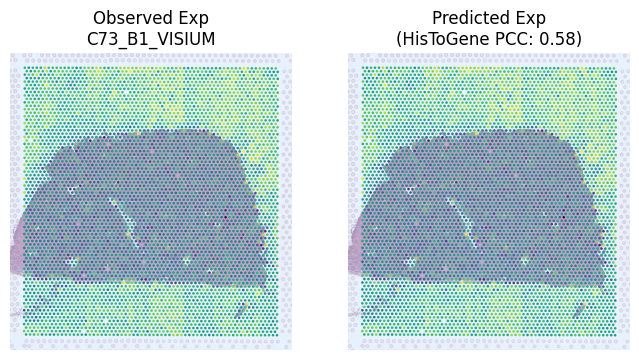

In [24]:
dataset_name = "Liver_visium"
slide = "C73_B1_VISIUM"
model_name = "histogene"
target_gene = "MT-CO3"
pcc = 0.58
obs_title = f"Observed Exp\n{slide}"
pred_title = f"Predicted Exp\n(HisToGene PCC: {pcc:.2f})"

vis_gene_splot(dataset_name, slide, model_name, target_gene, obs_title, pred_title)


In [6]:
def vis_gene_splot(dataset_name, slide, model_name, 
                   target_gene, obs_title, pred_title):
    tmp = sc.read_h5ad(f"../Dataset/{dataset_name}/{slide}.h5ad")
    pred = sc.read_h5ad(f"../Results/{dataset_name}/pred_{model_name}_{dataset_name}_reinhard_{slide}_func.h5ad")
    gt = sc.read_h5ad(f"../Results/{dataset_name}/gt_{model_name}_{dataset_name}_reinhard_{slide}_func.h5ad")
    gt.uns = tmp.uns
    # gt.X = pred.X
    pred.uns["spatial"] = gt.uns["spatial"]
    pred.obsm["spatial"] = gt.obsm["spatial"]
    
    fig, axs = plt.subplots(1, 2, figsize=(8, 6))
    sc.pl.spatial(gt, color=target_gene, show=False, frameon=False, alpha_img=0.5,
                    title=obs_title, legend_fontsize="x-large", ax=axs[0], colorbar_loc=None)

    sc.pl.spatial(pred, color=target_gene, show=False, frameon=False, alpha_img=0.5,
                    title=pred_title, legend_fontsize="x-large", ax=axs[1], colorbar_loc=None)
    gc.collect()

    

In [7]:
BC_Visium_df = df[df["Dataset"] == "BC_visium"]
result_df = BC_Visium_df.groupby(["Method", "Slides"])["Pearson correlation"].idxmax()
top_genes_df = BC_Visium_df.loc[result_df]
x = top_genes_df[["Method", "Gene", "Pearson correlation", "Slides"]]
x[x["Slides"]=="block2"]

Method    Gene  Pearson correlation  Slides
434525      bleep    GNAS             0.607199  block2
420207     deeppt    PBX1             0.632994  block2
476905  deepspace    GNAS             0.635570  block2
492013    hist2st    CD74             0.457637  block2
462073  histogene    CSF2             0.059155  block2
480108    stimage   GATA3             0.556089  block2
399358      stnet  CTNNB1             0.364169  block2

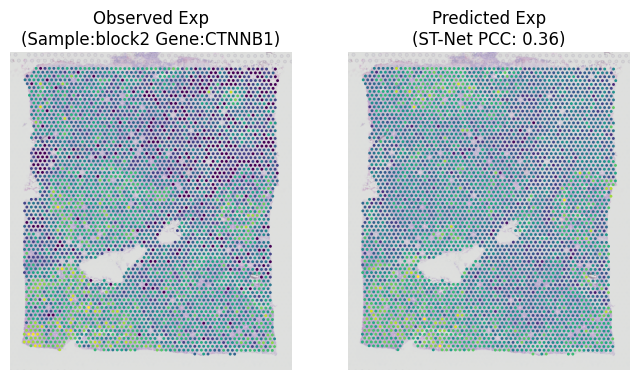

In [8]:
dataset_name = "BC_visium"
slide = "block2"
model_name = "stnet"
target_gene = "CTNNB1"
pcc = 0.36
obs_title = f"Observed Exp\n(Sample:{slide} Gene:{target_gene})"
pred_title = f"Predicted Exp\n(ST-Net PCC: {pcc:.2f})"

vis_gene_splot(dataset_name, slide, model_name, target_gene, obs_title, pred_title)


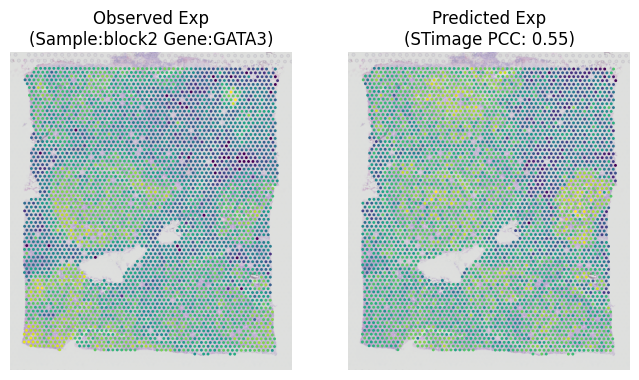

In [9]:
dataset_name = "BC_visium"
slide = "block2"
model_name = "stimage"
target_gene = "GATA3"
pcc = 0.55
obs_title = f"Observed Exp\n(Sample:{slide} Gene:{target_gene})"
pred_title = f"Predicted Exp\n(STimage PCC: {pcc:.2f})"

vis_gene_splot(dataset_name, slide, model_name, target_gene, obs_title, pred_title)


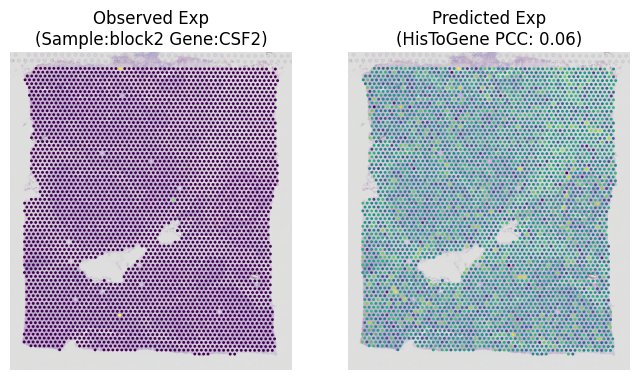

In [10]:
dataset_name = "BC_visium"
slide = "block2"
model_name = "histogene"
target_gene = "CSF2"
pcc = 0.06
obs_title = f"Observed Exp\n(Sample:{slide} Gene:{target_gene})"
pred_title = f"Predicted Exp\n(HisToGene PCC: {pcc:.2f})"

vis_gene_splot(dataset_name, slide, model_name, target_gene, obs_title, pred_title)


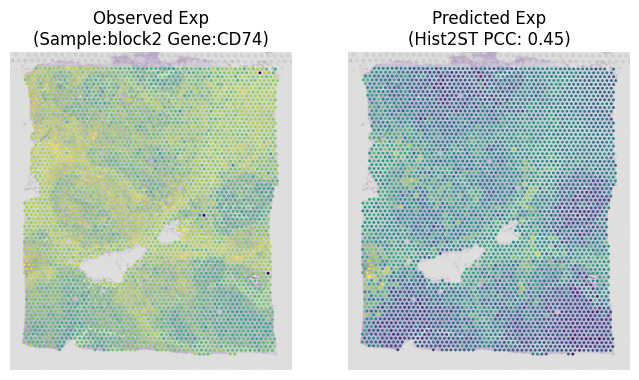

In [11]:
dataset_name = "BC_visium"
slide = "block2"
model_name = "hist2st"
target_gene = "CD74"
pcc = 0.45
obs_title = f"Observed Exp\n(Sample:{slide} Gene:{target_gene})"
pred_title = f"Predicted Exp\n(Hist2ST PCC: {pcc:.2f})"

vis_gene_splot(dataset_name, slide, model_name, target_gene, obs_title, pred_title)


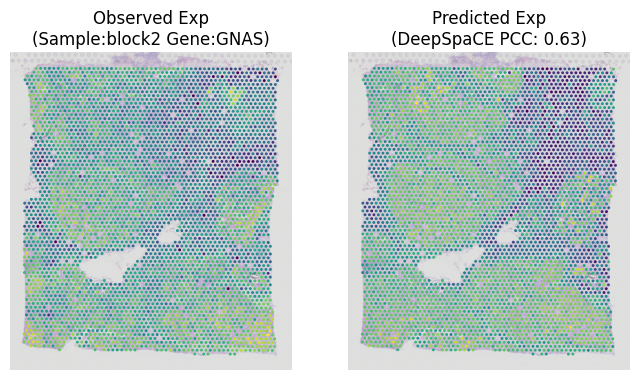

In [12]:
dataset_name = "BC_visium"
slide = "block2"
model_name = "deepspace"
target_gene = "GNAS"
pcc = 0.63
obs_title = f"Observed Exp\n(Sample:{slide} Gene:{target_gene})"
pred_title = f"Predicted Exp\n(DeepSpaCE PCC: {pcc:.2f})"

vis_gene_splot(dataset_name, slide, model_name, target_gene, obs_title, pred_title)


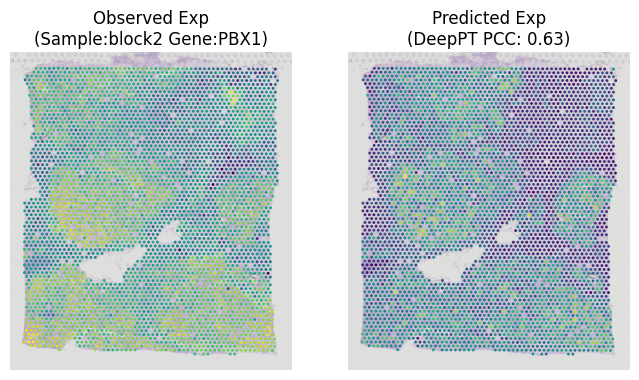

In [13]:
dataset_name = "BC_visium"
slide = "block2"
model_name = "deeppt"
target_gene = "PBX1"
pcc = 0.63
obs_title = f"Observed Exp\n(Sample:{slide} Gene:{target_gene})"
pred_title = f"Predicted Exp\n(DeepPT PCC: {pcc:.2f})"

vis_gene_splot(dataset_name, slide, model_name, target_gene, obs_title, pred_title)


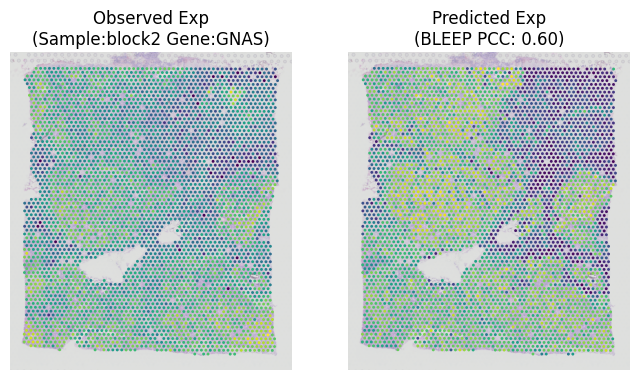

In [14]:
dataset_name = "BC_visium"
slide = "block2"
model_name = "bleep"
target_gene = "GNAS"
pcc = 0.60
obs_title = f"Observed Exp\n(Sample:{slide} Gene:{target_gene})"
pred_title = f"Predicted Exp\n(BLEEP PCC: {pcc:.2f})"

vis_gene_splot(dataset_name, slide, model_name, target_gene, obs_title, pred_title)
